In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import copy
import sys
import os

from numpy import mean
from numpy import cov

from numpy.linalg import eigh

def visualize(im1, im2, k):
	# displays two images
    im1 = im1.astype('uint8')
    #im2 = im2.astype('uint8')
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(im1,cmap='gray')
    plt.axis('off')
    plt.title('Original')
    f.add_subplot(1,2, 2)
    plt.imshow(im2,cmap='gray')
    plt.axis('off')
    plt.title('Cluster: '+str(k))
    plt.savefig('k_means_'+str(k)+'.jpg')
    plt.show()
    return None

def MSE(Im1, Im2):
	# computes error
	Diff_Im = Im2-Im1
	Diff_Im = np.power(Diff_Im, 2)
	Diff_Im = np.sum(Diff_Im)
	Diff_Im = np.sqrt(Diff_Im)
	sum_diff = np.sum(np.sum(Diff_Im))
	avg_error = sum_diff / float(Im1.shape[0]*Im2.shape[1])
	return avg_error

In [2]:
data = []
paths = []
ans = []
for r, d, f in os.walk('../../Data/Faces/'):
    for file in f:
        if '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    data.append(np.array(img))

In [3]:
len(data)

100

In [4]:
data = np.array(data)

In [5]:
#reshape 3 dimensional data to 2 dimensions
noprob = np.array(data).reshape(100,2500)

In [6]:
#find the mean of the dataset
M = mean(noprob.T,axis=1)

In [7]:
M.shape

(2500,)

In [8]:
#center dataset over zero
C = noprob - M

In [9]:
C.shape

(100, 2500)

In [10]:
#covariance matrix
V = C.T
V = cov(V)

In [11]:
V.shape

(2500, 2500)

In [12]:
# find the eigenvalues and eigenvectors of covariance matrix
f, e_vectors = eigh(V)
print(e_vectors.shape)

(2500, 2500)


In [14]:
f

array([-5.85510781e-10, -3.70310991e-10, -3.59248640e-10, ...,
        3.09633602e+05,  4.27594800e+05,  3.38296049e+06])

In [13]:
# project data
w = e_vectors.T
x = C.T
y = w.dot(x)
print(y.T.shape)

(100, 2500)


In [14]:
#compressed representation of data
compressed = y.T

In [15]:
img = 9
k = 100
recon = 0
#reconstruct data using K eigenvectors
for i in range(2499,2499-k,-1):
    recon += e_vectors.T[i] * compressed[img][i]

In [16]:
#reshape image back to orignal shape
recon = np.array(recon)
recon = recon.reshape(50,50)

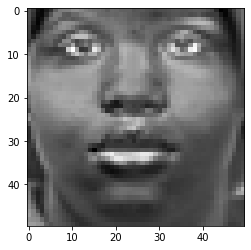

In [17]:
plt.imshow(recon,cmap='gray')

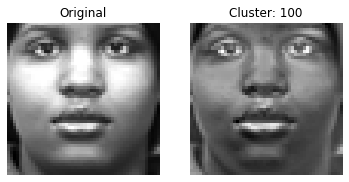

In [18]:
visualize(data[img],recon,k)

In [19]:
MSE(data[img],recon)

2.978562834807417